# Image Compression using SVD

### Explanation of Single Value Decomposition (SVD)
<blockquote>
As usual, the first step is to normalise the data i.e. center the data by subtracting its mean. Make sure that each training set (row of data) is subtracted by its respective mean only.<br><br>
SVD of a matrix X is a product decomposition of 3 matrices U, S and V that compose of block arrangement of data in a hierarchial (descending magnitude) fashion.<br><br>
X = U$\Sigma V^T$<br><br>
•• Matrix U: U is an orthogonal (m x m) and singular matrix that represents the size of the data (training sets). Each column of U indicates a summary (or Blueprint) of the cumulative training data in a hierarchial order.They can be termed as the EIGENFACES of the X matrix.<br><br>
•• Matrix $\Sigma$: This is a non-negative hierarchially ordered Diagonal Matrix (m x n). Each singular value in $\Sigma$ corresponds to the respective singular vector in U and V. In other words, the singular values define the WEIGHTAGE/SCALING (VARIANCE) given to the corresponding vectors in U and V matrices.<br><br>
•• Matrix V: This is also an orthogonal (n x n) and singular TRANSPOSED matrix. Each row can be defined as a proportion of mix that each column in corresponding U has to undergo to result in X matrix. They can be called EIGENMIXTURES.<br><br>
For example, The blueprint of first row of U mixed in proportions given by first row of V matrix and scaled by the value $\Sigma$ give us the first column of the data with it's hierarchially organised feature set. <br><br>
    
<b>Thus, using SVD, by selecting just a few columns (dimensions) of the U-matrix and the corresponding $\Sigma$ and V, most of the data can be stored in this reduced matrix.</b>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
from scipy.io import loadmat

### Mean Normalisation and Visualisation of Original Data

In [2]:
data2 = loadmat('ex7faces.mat')
X = data2['X']
X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
print(f'The mean of the first original training set (first row) is {np.mean(X, axis=0)[0].round(2)}.\
\nAfter MEAN NORMALISATION, the mean of the first training set is {np.mean(X_norm, axis=0)[0].round(2)}')

The mean of the first original training set (first row) is -21.74.
After MEAN NORMALISATION, the mean of the first training set is 0.0


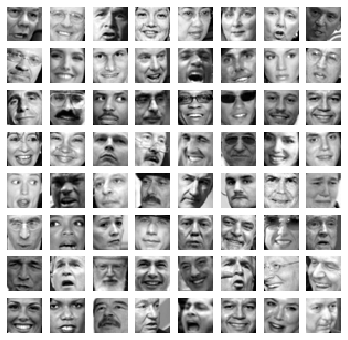

In [3]:
arr = np.random.randint(1,4000,(8,8))
fig, ax = plt.subplots(8,8, figsize=(6,6))
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(np.rot90(X[arr[i,j]].reshape(32,32), k=-1), cmap = 'gray')
        ax[i,j].axis('off')

plt.show()

### SVD using Python

In [4]:
U, S, VT = np.linalg.svd(X_norm)
S_diag = np.diag(S)

print('The size of image matrix, X is',X_norm.shape)
print('\nThe size of U orthogonal matrix is',U.shape)
print('The size of VT orthogonal matrix is',VT.shape)
print('\nThe size of sigma singular matrix is',S.shape)
print('The diagonals of sigma matrix form',S_diag.shape)

The size of image matrix, X is (5000, 1024)

The size of U orthogonal matrix is (5000, 5000)
The size of VT orthogonal matrix is (1024, 1024)

The size of sigma singular matrix is (1024,)
The diagonals of sigma matrix form (1024, 1024)


### Data Dimensionality Reduction Comparison 

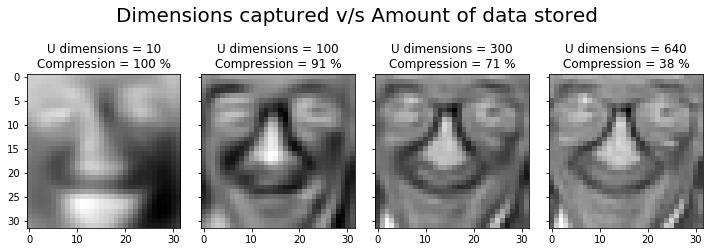

In [5]:
colm_select = [10, 100, 300, 640]
fig2, ax2 = plt.subplots(1,4, figsize=(10,5),sharey=True)

for j, i in enumerate (colm_select):
    X_approx = U[:,:i].dot(S_diag[:i,:i]).dot(VT[:i,:])
    ax2[j].imshow(np.rot90(X_approx[0].reshape(32,32), k=-1), cmap = 'gray')
    ax2[j].set_title(f'U dimensions = {i}\nCompression = {100 - int((i/1024)*100)} %')

fig2.suptitle('Dimensions captured v/s Amount of data stored', y=0.9, fontsize=20)
plt.tight_layout()

### Matrix of the first 100 Principal Components

Left - Original Data
Right - Reconstructed Data


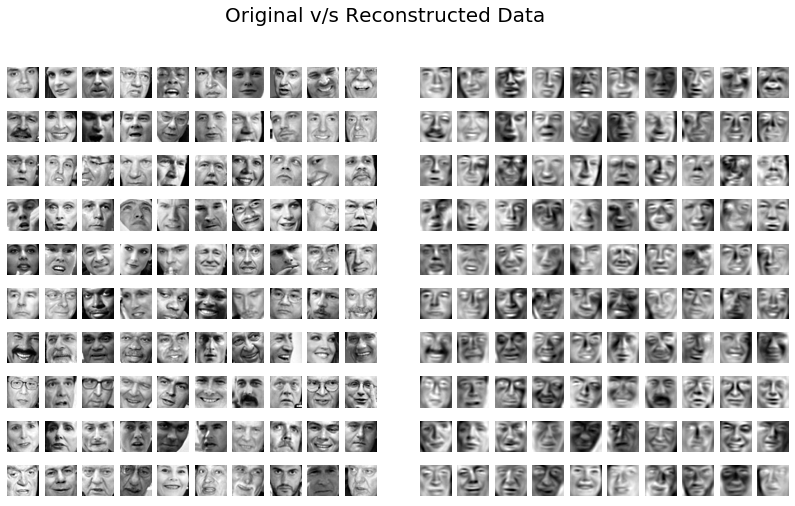

In [6]:
X_original = data2['X']
X_approx_100 = U[:,:100].dot(S_diag[:100,:100]).dot(VT[:100,:])

fig, ax = plt.subplots(10,21,figsize=(14,8))
arr = np.random.randint(1,4999,(10,10))

for i in range(10):
    for j in range(0,10):
        ax[i,j].imshow(np.rot90(X_original[arr[i,j]].reshape(32,32), k=-1), cmap = 'gray')
        ax[i,j].axis('off')
    for j in range(10,11):
        ax[i,j].axis('off')
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
    for j in range(11,21):
        ax[i,j].imshow(np.rot90(X_approx_100[arr[i,j-11]].reshape(32,32), k=-1), cmap = 'gray')
        ax[i,j].axis('off')

fig.suptitle('Original v/s Reconstructed Data', fontsize = 20)
print('Left - Original Data\nRight - Reconstructed Data')
plt.show()

### Weights of the Singular Matrix

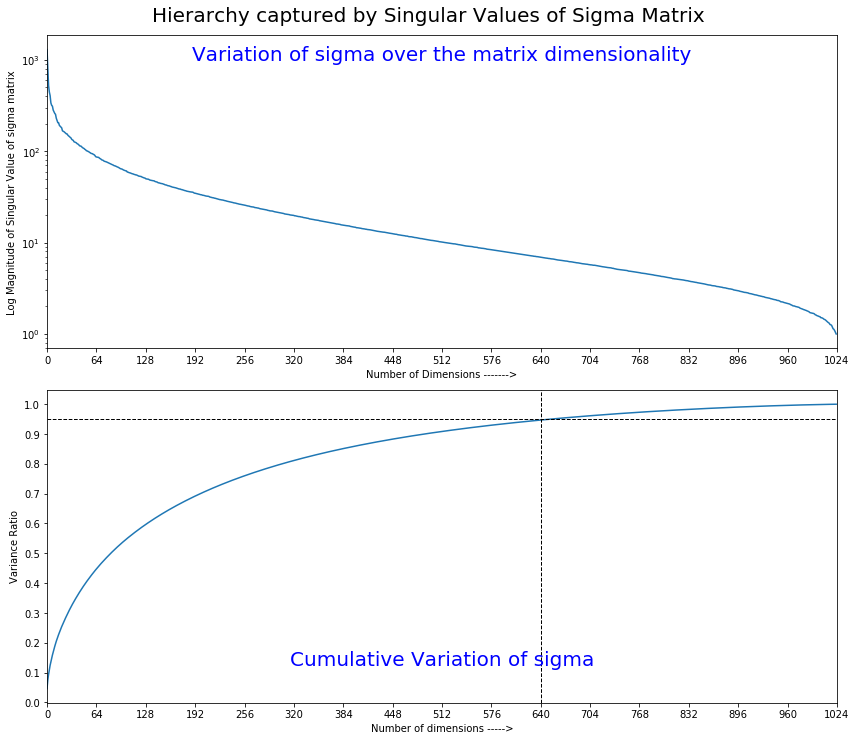

In [7]:
fig3 , ax3 = plt.subplots(2,1,figsize=(12,10))

ax3[0].semilogy(S)
ax3[0].set_xlim(0,1024)
ax3[0].set_xticks(range(0,1088,64))
ax3[0].set_xlabel('Number of Dimensions ------->')
ax3[0].set_ylabel('Log Magnitude of Singular Value of sigma matrix')
ax3[0].set_title('Variation of sigma over the matrix dimensionality', y=0.9, fontsize=20, color='blue')

ax3[1].plot(np.cumsum(S)/np.sum(S))
ax3[1].set_xlim(0,1024)
ax3[1].set_xlabel('Number of dimensions ----->')
ax3[1].set_xticks(range(0,1056,64))
ax3[1].set_ylabel('Variance Ratio')
ax3[1].set_yticks(np.arange(0,1.1,0.1))
ax3[1].set_title('Cumulative Variation of sigma', y=0.1, fontsize=20, color='blue')
plt.axvline(640, linestyle='--', color='black', linewidth=1)
plt.axhline(0.95, linestyle='--', color='black', linewidth=1)

fig3.suptitle('Hierarchy captured by Singular Values of Sigma Matrix', y=1.025, fontsize=20)
plt.tight_layout()
plt.show()

<blockquote>
&emsp;1. The first graph is called an 'Elbow Plot' and it shows the hierarchy of magnitude of $\Sigma$ over the dimensions (columns). We see that lots of data is captured in the first 50 dimensions itself.<br><br>
&emsp;2. The second graph is a cumulative loss/capture of variance in the data over the dimensions.<br>
<b>&emsp;&ensp;&emsp;&ensp;&emsp;&ensp;&emsp;&ensp;&emsp;The formula is $ \frac{\sum \limits _{i=1} ^{k} S_{ii}}{\sum \limits _{i=1} ^{m} S_{ii}} $ where, <br></b>
    &emsp;&ensp;• $S_{ii}$ indicates the diagonal element singular values in the $\Sigma$ matrix.<br>
    &emsp;&ensp;• 'k' indicates the dimensions considered for compression and cumulative sum.<br>
    &emsp;&ensp;• 'm' indicates the total number of dimensions in the U-matrix which is equal to the total number of training sets.<br><br><b>It is observed that for about 300 dimensions, 80% of the Variance has been captured.</b>